In [ ]:
# TBATS (Trigonometric, Box-Cox Transformation, ARMA Errors, Trend, and Seasonal Components)

In [ ]:
# pip install pandas matplotlib tbats yfinance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tbats import TBATS
import yfinance as yf
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.stattools import adfuller

In [2]:
# Function to check stationarity
def check_stationarity(data):
    result = adfuller(data)
    return result[1] <= 0.05  # p-value

In [5]:
# Download Bitcoin data
btc_data = yf.download('BTC-USD', start='2020-01-01', end='2024-01-01', interval='1d')

# Extract the 'Close' price
btc_close = btc_data['Close'].dropna()

# Ensure 'Close' is numeric
btc_close = pd.to_numeric(btc_close, errors='coerce')

# Create a DataFrame for feature engineering
btc_close = pd.DataFrame(btc_close)

[*********************100%%**********************]  1 of 1 completed


In [7]:
btc_close.head()

,Close
Date,
2020-01-01,7200.174316
2020-01-02,6985.470215
2020-01-03,7344.884277
2020-01-04,7410.656738
2020-01-05,7411.317383


In [9]:
# Feature Engineering
btc_close['Lag1'] = btc_close['Close'].shift(1)
btc_close['Lag7'] = btc_close['Close'].shift(7)
btc_close['MA7'] = btc_close['Close'].rolling(window=7).mean()
btc_close['MA30'] = btc_close['Close'].rolling(window=30).mean()
btc_close['Returns'] = btc_close['Close'].pct_change()

In [11]:
# Drop NaN values from new features
btc_close = btc_close.dropna()

# Check stationarity
if not check_stationarity(btc_close['Close']):
    print("Data is not stationary. Consider differencing or transformations.")

Data is not stationary. Consider differencing or transformations.


In [13]:
# Splitting the data into training and testing sets
train_size = int(len(btc_close) * 0.8)
train, test = btc_close[:train_size], btc_close[train_size:]

# Fit the TBATS model on training data
tbats_model = TBATS(seasonal_periods=[7])
tbats_fitted = tbats_model.fit(train['Close'])

Mean Absolute Error: 3684.3565271778166


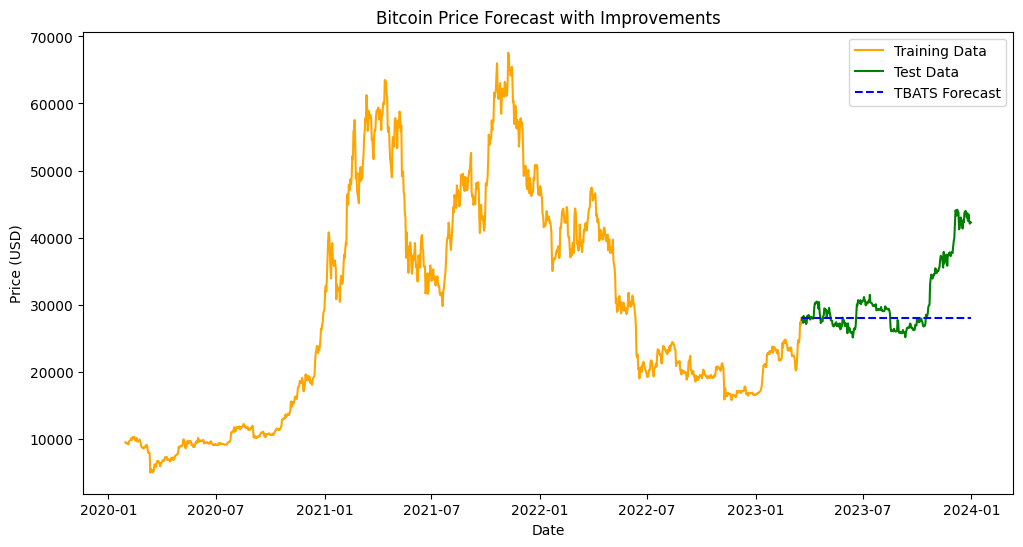

In [14]:
# Forecasting
forecast = tbats_fitted.forecast(steps=len(test))

# Evaluate the model
mae = mean_absolute_error(test['Close'], forecast)
print(f'Mean Absolute Error: {mae}')

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(train['Close'], label='Training Data', color='orange')
plt.plot(test['Close'].index, test['Close'], label='Test Data', color='green')
plt.plot(test['Close'].index, forecast, label='TBATS Forecast', color='blue', linestyle='--')
plt.title('Bitcoin Price Forecast with Improvements')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()